# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url+city).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lon = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lorengau
Processing Record 2 of Set 1 | salacgriva
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | okahandja
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | sao pedro do sul
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | inderborskiy
City not found. Skipping...
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | ajdabiya
Processing Record 13 of Set 1 | north bend
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | sitka
Processing Record 16 of Set 1 | talnakh
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | pesochnoye
Processing Record 21 of Set 1 | castro
Processing Record

Processing Record 35 of Set 4 | kodiak
Processing Record 36 of Set 4 | richards bay
Processing Record 37 of Set 4 | hermosillo
Processing Record 38 of Set 4 | faya
Processing Record 39 of Set 4 | touros
Processing Record 40 of Set 4 | atbasar
Processing Record 41 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 42 of Set 4 | douentza
Processing Record 43 of Set 4 | kungsbacka
Processing Record 44 of Set 4 | tukrah
Processing Record 45 of Set 4 | ribeira grande
Processing Record 46 of Set 4 | udachnyy
Processing Record 47 of Set 4 | stanovoye
Processing Record 48 of Set 4 | saryshagan
City not found. Skipping...
Processing Record 49 of Set 4 | cabedelo
Processing Record 0 of Set 5 | mandurah
Processing Record 1 of Set 5 | olafsvik
Processing Record 2 of Set 5 | broome
Processing Record 3 of Set 5 | zuya
Processing Record 4 of Set 5 | gulmarg
Processing Record 5 of Set 5 | faanui
Processing Record 6 of Set 5 | zheleznodorozhnyy
Processing Record 7 of Set 5 | coquimbo

Processing Record 24 of Set 8 | karaton
Processing Record 25 of Set 8 | bowling green
Processing Record 26 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 27 of Set 8 | norman wells
Processing Record 28 of Set 8 | marabba
Processing Record 29 of Set 8 | illapel
Processing Record 30 of Set 8 | warrington
Processing Record 31 of Set 8 | chimbote
Processing Record 32 of Set 8 | kangaatsiaq
Processing Record 33 of Set 8 | araouane
Processing Record 34 of Set 8 | contepec
Processing Record 35 of Set 8 | bokoro
Processing Record 36 of Set 8 | shubarshi
Processing Record 37 of Set 8 | jibuti
Processing Record 38 of Set 8 | skibbereen
Processing Record 39 of Set 8 | montepuez
Processing Record 40 of Set 8 | vanimo
Processing Record 41 of Set 8 | mahadday weyne
City not found. Skipping...
Processing Record 42 of Set 8 | madras
Processing Record 43 of Set 8 | severo-kurilsk
Processing Record 44 of Set 8 | bambous virieux
Processing Record 45 of Set 8 | inhambane
Processing Recor

Processing Record 15 of Set 12 | phetchaburi
Processing Record 16 of Set 12 | pak phanang
Processing Record 17 of Set 12 | doha
Processing Record 18 of Set 12 | nara
Processing Record 19 of Set 12 | saint-augustin
Processing Record 20 of Set 12 | tombouctou
Processing Record 21 of Set 12 | pionerskiy
Processing Record 22 of Set 12 | turukhansk
Processing Record 23 of Set 12 | rundu
Processing Record 24 of Set 12 | san cristobal
Processing Record 25 of Set 12 | karapyshi
Processing Record 26 of Set 12 | san lawrenz
Processing Record 27 of Set 12 | sayhat
Processing Record 28 of Set 12 | thuin
Processing Record 29 of Set 12 | saint-nazaire
Processing Record 30 of Set 12 | severnyy
Processing Record 31 of Set 12 | huarmey
Processing Record 32 of Set 12 | asyut
Processing Record 33 of Set 12 | findlay
Processing Record 34 of Set 12 | maniitsoq
Processing Record 35 of Set 12 | itoman
Processing Record 36 of Set 12 | saint george
Processing Record 37 of Set 12 | galveston
Processing Record 3

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lorengau,-2.0226,147.2712,27.85,80,99,4.32,PG,1670122942
1,salacgriva,57.7536,24.3581,-3.12,94,100,3.14,LV,1670122942
2,avarua,-21.2078,-159.7750,28.03,83,100,3.60,CK,1670122943
3,okahandja,-21.9833,16.9167,22.13,22,75,1.32,NA,1670122943
4,cape town,-33.9258,18.4232,16.60,72,1,3.58,ZA,1670122943


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.sample

<bound method NDFrame.sample of                City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                  
0          lorengau  -2.0226  147.2712     27.85        80          99   
1        salacgriva  57.7536   24.3581     -3.12        94         100   
2            avarua -21.2078 -159.7750     28.03        83         100   
3         okahandja -21.9833   16.9167     22.13        22          75   
4         cape town -33.9258   18.4232     16.60        72           1   
...             ...      ...       ...       ...       ...         ...   
561           alihe  50.5667  123.7167    -19.85        69          13   
562           orlik  52.5178   99.8250    -24.49        87          75   
563          dingle  10.9995  122.6711     29.43        72          65   
564            kaeo -35.1000  173.7833     21.05        56           8   
565           nizwa  22.9333   57.5333     17.65        67           0   

     

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

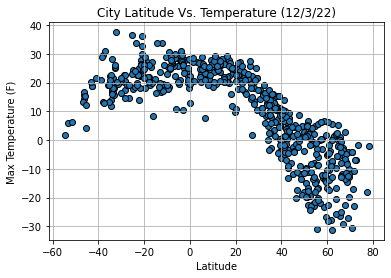

In [10]:
# Build scatter plot for latitude vs. temperature
xl = city_data_df['Lat']
yt = city_data_df['Max Temp']
plt.scatter(xl, yt, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude Vs. Temperature (12/3/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

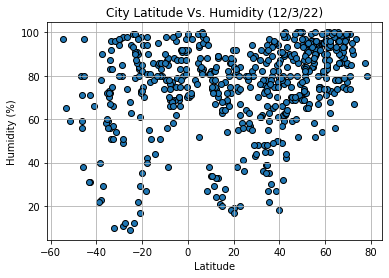

In [11]:
# Build the scatter plots for latitude vs. humidity
yh = city_data_df['Humidity']
plt.scatter(xl, yh, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity (12/3/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

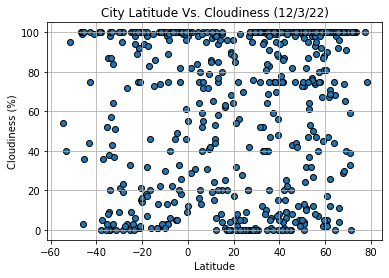

In [12]:
# Build the scatter plots for latitude vs. cloudiness
yc = city_data_df['Cloudiness']
plt.scatter(xl, yc, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (12/3/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

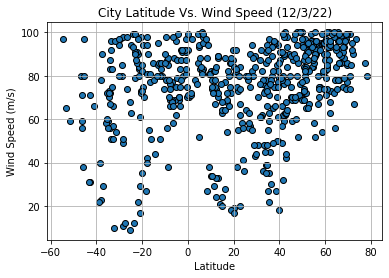

In [13]:
# Build the scatter plots for latitude vs. wind speed
yw = city_data_df['Wind Speed']
plt.scatter(xl, yh, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed (12/3/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def LR(x, y, xl, yl):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x, y)
    plt.xlabel(xl)
    plt.ylabel(yl)    
    print(f"The r-squared is: {rvalue**2}")
    print(line_eq)
    plt.plot(x, regress_values, "r-")
    #plt.annotate(line_eq, xy=(25, 30), fontsize=14, color="red")
    plt.show()


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,salacgriva,57.7536,24.3581,-3.12,94,100,3.14,LV,1670122942
8,chokurdakh,70.6333,147.9167,-30.72,99,59,4.67,RU,1670122944
9,ajdabiya,30.7554,20.2263,14.28,48,0,5.41,LY,1670122944
10,north bend,43.4065,-124.2243,7.82,98,100,2.18,US,1670122945
12,sitka,57.0531,-135.3300,0.15,67,7,0.75,US,1670122945


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lorengau,-2.0226,147.2712,27.85,80,99,4.32,PG,1670122942
2,avarua,-21.2078,-159.7750,28.03,83,100,3.60,CK,1670122943
3,okahandja,-21.9833,16.9167,22.13,22,75,1.32,NaN,1670122943
4,cape town,-33.9258,18.4232,16.60,72,1,3.58,ZA,1670122943
5,rikitea,-23.1203,-134.9692,23.76,79,6,6.17,PF,1670122943


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7152878703839307
y = -0.67x + 31.65


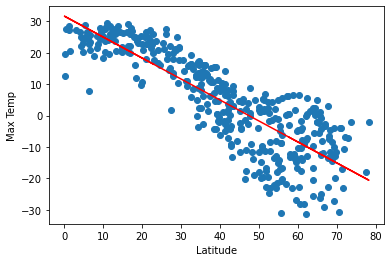

In [17]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

LR(x, y, xl="Latitude", yl="Max Temp")

The r-squared is: 0.2146129874648607
y = 0.21x + 26.53


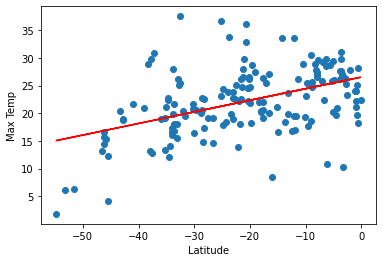

In [18]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

LR(x, y, xl="Latitude", yl="Max Temp")

**Discussion about the linear relationship:** 
    The Northern Hemisphere's temperature decreases as the latitude increases being a STRONG NEGATIVE relationship. The Southern Hemisphere's temperature increases as the latitude increases. The plots are more spaced but the line of best fit is rising as latitude increases, meaning the Southern HEmisphere is showing a WEAK POSITIVE relationship.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.1189672332047112
y = 0.34x + 63.33


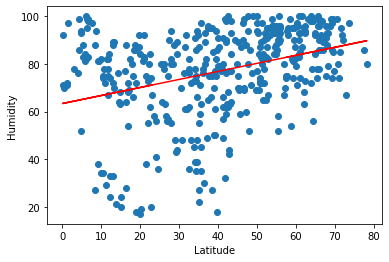

In [25]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

LR(x, y, xl="Latitude", yl="Humidity")

The r-squared is: 0.0711333482375173
y = 0.43x + 81.0


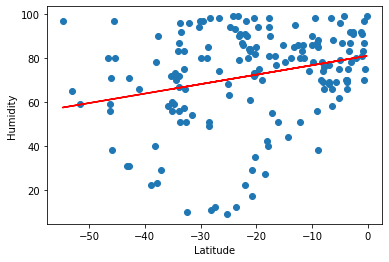

In [26]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

LR(x, y, xl="Latitude", yl="Humidity")

**Discussion about the linear relationship:** 
    The Northern Hemisphere shows a STRONG POSITIVE with the plots being more compact together and the line of best fit increasing as latitude increases. The Southern Hemisphere also shows an increasing line of best fit while latitude increases BUT with the plots being more spread out, it represents a WEAK POSITIVE releationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0496692471862357
y = 0.44x + 46.4


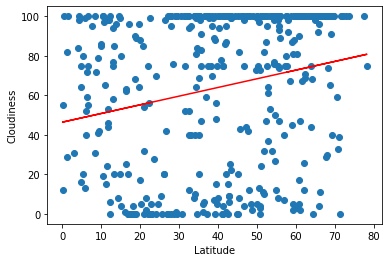

In [27]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']

LR(x, y, xl="Latitude", yl="Cloudiness")

The r-squared is: 0.008357703363912703
y = 0.28x + 65.41


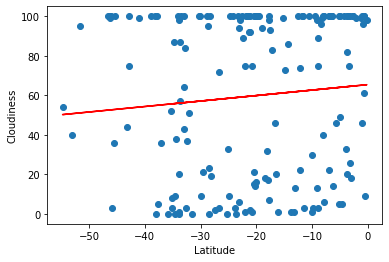

In [28]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']

LR(x, y, xl="Latitude", yl="Cloudiness")

**Discussion about the linear relationship:** 
    The Northern Hemisphere shows a STRONG POSITIVE with having more condensed plots while the Southern Hemisphere shows a WEAK POSITIVE with more spaced out plots. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.04988181564510082
y = 0.03x + 2.38


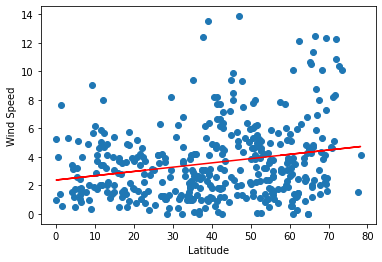

In [23]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']

LR(x, y, xl="Latitude", yl="Wind Speed")

The r-squared is: 0.08211593222332217
y = -0.05x + 2.41


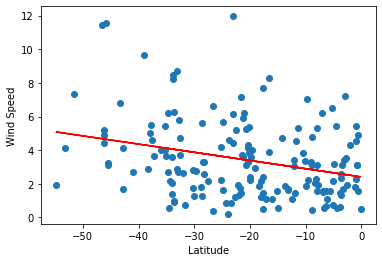

In [24]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

LR(x, y, xl="Latitude", yl="Wind Speed")

**Discussion about the linear relationship:** 
    In both the scatter plots, the majority of windspeed by latidude appears to be below the 8 mark by windspeed. For the Northern Hemisphere there are more higher windspeed as latidude increases being a STRONG POSITIVE. However the Southern Hemisphere appears to be a WEAK NEGATIVE. 